In [200]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import seaborn as sns
%matplotlib inline

# chargement des algorithmes scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

# utilisatires scikit-learn
from sklearn.datasets import fetch_mldata
from sklearn import model_selection
from sklearn.metrics import accuracy_score

# timer
import timeit

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [201]:
# import data
dt = pnd.read_table("C:\\Users\\walid_000\\Desktop\\scoring\\Auto\\ResiliationContratAuto.txt", sep='|', encoding = "ISO-8859-1")
data = pnd.DataFrame(dt)

In [202]:
data.shape

(90247, 58)

# Handling missing values

NO_AFR 0
CDUSGAUT 16
IDECON 0
CD_AGT 0
CD_FML 545
CDPRGES 0
DTDBUCON 0
DTEFTMVT 0
MMJECHPP 16
MTPAATTC 0
AUTO4R 0
NOCLIGES 0
NUMFOY 0
CDMARVEH 87
DTOBTPDC 193
DTPMRMCI 932
LBMDLVH 110
NOTAREFF 267
PUI_TRE 166
RN_VL_VH 170
S_2_N 80735
S_3_N 82150
S_1_N 79468
S_0_N 79696
S_3_O 87332
S_2_O 86675
S_1_O 85963
S_0_O 85812
NIVBM 0
MTPAAREF 0
CDMCE 0
NBCTRES 0
ANCCLI 17
CD_CSP 39662
CD_SEX 100
DT_NAI 205
CDSITFAM 360
DEPT 199
REGION 199
NBCTACT 4572
AU4R 4572
MH 4572
DI 4572
SA 4572
IV 4572
RESAU4R 63741
RESMH 63741
RESSA 63741
RESIV 63741
RESDI 63741
CLIACTIF 0
U 0
CONTRAT 0
ETAT 0
MOTIFRSL 80214
COEFCOMM 0
COEFPFLT 0
CRM 0


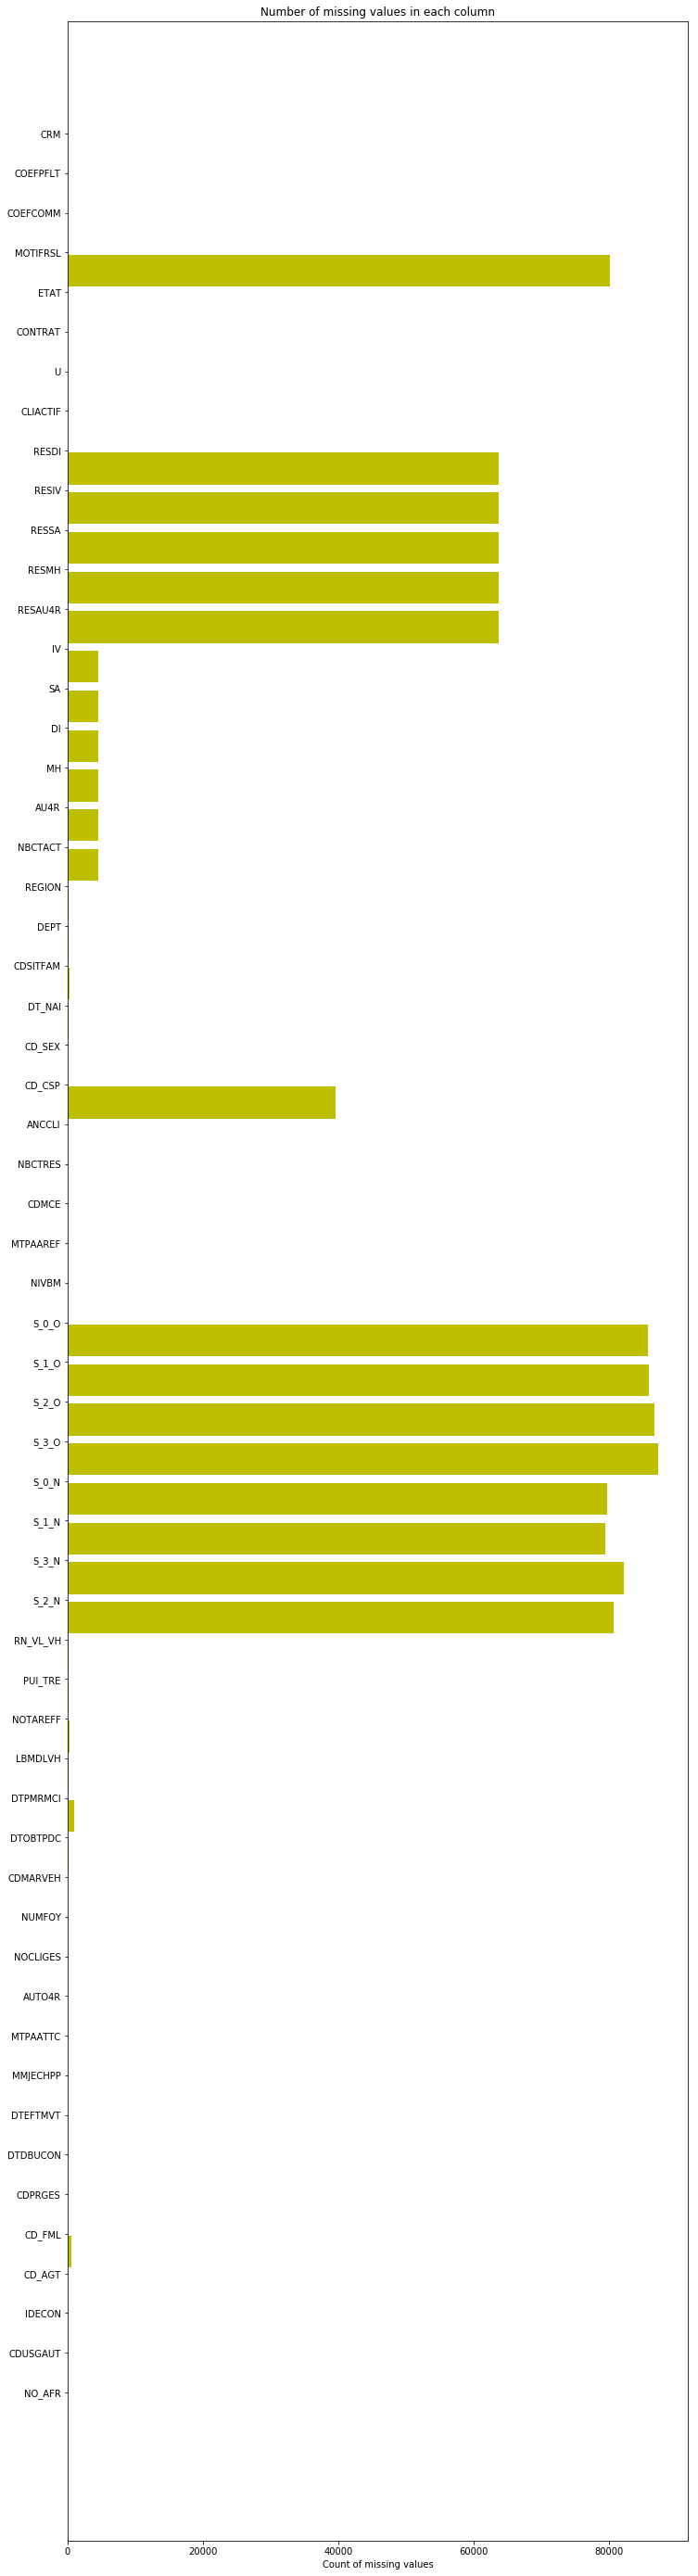

In [203]:
# from : https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-5
#missing values
labels = []
values = []
for col in data.columns:
    labels.append(col)
    values.append(data[col].isnull().sum())
    print(col, values[-1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

In [204]:
#je supprime pas NOCLIGES, COEFCOMM, COEFPFLT, CRM
df = data.drop(["NO_AFR", "CDUSGAUT", "CD_AGT", "CDPRGES", "AUTO4R", "NUMFOY", "U", "CD_CSP", "MOTIFRSL", "IDECON", "ETAT", "CLIACTIF", "NOCLIGES", "COEFPFLT"], axis=1)

In [205]:
#df.dtypes

In [206]:
#Remplacer les NaN par 0 pour les variables : S_2_N, S_3_N, S_1_N, S_0_N, S_3_O, S_2_O, S_1_O, S_0_O, RESAU4R, RESMH, RESSA, 
#RESIV, RESDI

df[["S_2_N", "S_3_N", "S_1_N", "S_0_N", "S_3_O", "S_2_O", "S_1_O", "S_0_O", "RESAU4R", "RESMH", "RESSA", "RESIV", "RESDI", "NBCTACT", "AU4R", "MH", "DI", "SA", "IV"]] = df[["S_2_N", "S_3_N", "S_1_N", "S_0_N", "S_3_O", "S_2_O", "S_1_O", "S_0_O", "RESAU4R", "RESMH", "RESSA", "RESIV", "RESDI", "NBCTACT", "AU4R", "MH", "DI", "SA", "IV"]].fillna(value=0).astype('int32')

In [207]:
df[["S_2_N","S_3_N","S_1_N","S_0_N","S_3_O","S_2_O","S_1_O","S_0_O","RESAU4R","RESMH","RESSA","RESIV","RESDI"]].head()

,S_2_N,S_3_N,S_1_N,S_0_N,S_3_O,S_2_O,S_1_O,S_0_O,RESAU4R,RESMH,RESSA,RESIV,RESDI
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
#Aggregation des variables: S_N, S_O, ACT et RES
df["S_N"] = df["S_0_N"] + df["S_1_N"] + df["S_2_N"] + df["S_3_N"]
df["S_O"] = df["S_0_O"] + df["S_1_O"] + df["S_2_O"] + df["S_3_O"]
df["RESAUTR"] = df["RESMH"] + df["RESSA"] + df["RESIV"] + df["RESDI"] 
df["ACAUTR"] = df["NBCTACT"] - df["AU4R"]

df = df.drop(["S_0_N", "S_1_N", "S_2_N", "S_3_N", "S_0_O", "S_1_O", "S_2_O", "S_3_O", "RESMH", "RESSA", "RESIV", "RESDI", "NBCTACT", "MH", "DI", "SA", "IV"], axis=1)

#39 variables retenus
df.shape


(90247, 31)

In [209]:
df.describe()

,DTDBUCON,DTEFTMVT,MMJECHPP,MTPAATTC,DTOBTPDC,DTPMRMCI,RN_VL_VH,NIVBM,MTPAAREF,NBCTRES,ANCCLI,DT_NAI,AU4R,RESAU4R,COEFCOMM,CRM,S_N,S_O,RESAUTR,ACAUTR
count,90247.000000,90247.000000,90231.000000,90247.000000,90054.000000,89315.000000,90077.000000,90247.000000,90247.000000,90247.000000,90230.000000,90042.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000
mean,11978.749166,14730.439006,618.089504,3076.072282,6205.395785,11428.437026,7.886575,59.095095,4999.849334,0.471096,10139.550438,-2936.040181,1.526821,0.265272,97.558800,59.095095,0.481678,0.175230,0.146664,1.251853
std,2622.812793,188.381009,349.453398,1959.322459,5070.297584,2153.892706,3.724296,16.162302,3482.808965,0.868376,3968.300952,5696.195202,1.016239,0.562726,8.357103,16.162302,0.811961,0.440343,0.462483,1.836455
min,-21549.000000,8948.000000,101.000000,0.000000,-14244.000000,-21549.000000,1.000000,0.000000,171.880000,0.000000,-24514.000000,-111462.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10750.000000,14693.000000,315.000000,1774.190000,2518.000000,10227.000000,5.000000,50.000000,2742.000000,0.000000,8070.000000,-6758.000000,1.000000,0.000000,96.000000,50.000000,0.000000,0.000000,0.000000,0.000000
50%,12626.000000,14765.000000,613.000000,2646.180000,6552.500000,11535.000000,7.000000,50.000000,4139.000000,0.000000,11259.000000,-2674.000000,1.000000,0.000000,100.000000,50.000000,0.000000,0.000000,0.000000,1.000000
75%,13970.000000,14807.000000,912.000000,3850.235000,10246.000000,13027.000000,10.000000,64.000000,6167.000000,1.000000,13041.750000,1424.000000,2.000000,0.000000,100.000000,64.000000,1.000000,0.000000,0.000000,2.000000
max,14883.000000,14944.000000,1231.000000,62556.820000,14879.000000,14792.000000,18.000000,289.000000,101296.000000,26.000000,14879.000000,14610.000000,36.000000,12.000000,595.000000,289.000000,9.000000,5.000000,9.000000,33.000000


In [210]:
#convertir en character
df[["DEPT"]] = df[["DEPT"]].astype("object")

#convertir les variables dates

dat = ["ANCCLI", "DTDBUCON", "DTEFTMVT", "DTOBTPDC", "DTPMRMCI"]
for d in dat:
    df[d] = pnd.to_datetime(df[d],  unit='d')

#delete rows with no values for DT_NAI & MMJECHPP
df = df[pnd.notnull(df['DT_NAI']) & pnd.notnull(df['MMJECHPP'])] # & pnd.notnull(df['DTPMRMCI']) & pnd.notnull(df['ANCCLI'])]

#Convertir la variable age de naissance à int64
df[['DT_NAI', 'MMJECHPP']] = df[['DT_NAI', 'MMJECHPP']].astype('int64')

#convertir la date de naissance et date d'echeance du contrat à format date
df["DT_NAI"] = pnd.to_timedelta(df["DT_NAI"], unit='d') + pnd.Timestamp('1970-1-1')

df["MMJECHPP"] = df["MMJECHPP"].apply(lambda x: '{0:0>4}'.format(x))
df["MMJECHPP"] = pnd.to_datetime(df["MMJECHPP"], format='%m%d')
df["MMJECHPP"] =  df["MMJECHPP"] + pnd.DateOffset(years=118)

In [211]:
# Calculer l'age client, veh et ancien
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df["AGE_VEH"] = df["DTPMRMCI"].apply(calculate_age)
df["AGE_CLIENT"] = df["DT_NAI"].apply(calculate_age)
df["ANCIEN"] = df["ANCCLI"].apply(calculate_age)
df["PERMIS"] = df["DTOBTPDC"].apply(calculate_age)

#Calcul de la durée du contrat
df["MMJECHPP"] = df.MMJECHPP.apply(lambda x: x.year)
df["DTDBUCON"] = df.DTDBUCON.apply(lambda x: x.year)
df["DUR_CONT"] = df["MMJECHPP"] - df["DTDBUCON"]

#df[["AGE_VEH", "AGE_CLIENT", "ANCIEN"]] = df[["AGE_VEH", "AGE_CLIENT", "ANCIEN"]].astype("int")
df = df.drop(["DTPMRMCI", "DT_NAI", "ANCCLI", "DTOBTPDC", "MMJECHPP", "DTDBUCON"], axis=1)

In [212]:
df.describe()

,MTPAATTC,RN_VL_VH,NIVBM,MTPAAREF,NBCTRES,AU4R,RESAU4R,COEFCOMM,CRM,S_N,S_O,RESAUTR,ACAUTR,AGE_VEH,AGE_CLIENT,ANCIEN,PERMIS,DUR_CONT
count,90026.000000,89856.000000,90026.000000,90026.00000,90026.000000,90026.000000,90026.000000,90026.000000,90026.000000,90026.000000,90026.000000,90026.000000,90026.000000,89097.000000,90026.000000,90009.000000,89884.000000,90026.000000
mean,3074.685900,7.886607,59.089719,4998.63207,0.471053,1.526581,0.265334,97.558950,59.089719,0.481939,0.175372,0.146535,1.252127,16.717656,56.025581,20.251741,31.027024,15.671484
std,1956.699226,3.723795,16.154039,3479.88625,0.868090,1.007293,0.562840,8.357214,16.154039,0.811957,0.440585,0.462091,1.837259,5.905174,15.595852,10.875749,13.882496,7.168592
min,0.000000,1.000000,0.000000,171.88000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-240.000000,7.000000,7.000000,8.000000
25%,1773.830000,5.000000,50.000000,2742.00000,0.000000,1.000000,0.000000,96.000000,50.000000,0.000000,0.000000,0.000000,0.000000,12.000000,44.000000,12.000000,20.000000,10.000000
50%,2645.510000,7.000000,50.000000,4138.00000,0.000000,1.000000,0.000000,100.000000,50.000000,0.000000,0.000000,0.000000,1.000000,16.000000,55.000000,17.000000,30.000000,14.000000
75%,3848.530000,10.000000,64.000000,6167.00000,1.000000,2.000000,0.000000,100.000000,64.000000,1.000000,0.000000,0.000000,2.000000,20.000000,66.000000,26.000000,41.000000,19.000000
max,62556.820000,18.000000,289.000000,101296.00000,26.000000,36.000000,12.000000,595.000000,289.000000,9.000000,5.000000,9.000000,33.000000,107.000000,315.000000,115.000000,87.000000,107.000000


In [213]:
df["DTEFTMVT"].describe()
df = df.drop(["DTEFTMVT"], axis=1)

In [214]:
#valeurs manquantes

missing_values = df.isnull().sum()
df.isnull().sum()

CD_FML        542
MTPAATTC        0
CDMARVEH       87
LBMDLVH       110
NOTAREFF      261
PUI_TRE       166
RN_VL_VH      170
NIVBM           0
MTPAAREF        0
CDMCE           0
NBCTRES         0
CD_SEX          3
CDSITFAM      189
DEPT          199
REGION        199
AU4R            0
RESAU4R         0
CONTRAT         0
COEFCOMM        0
CRM             0
S_N             0
S_O             0
RESAUTR         0
ACAUTR          0
AGE_VEH       929
AGE_CLIENT      0
ANCIEN         17
PERMIS        142
DUR_CONT        0
dtype: int64

In [215]:
cat_df = pnd.DataFrame(df.select_dtypes(include=['object']).copy())

cat_df.describe()

,CD_FML,CDMARVEH,LBMDLVH,NOTAREFF,PUI_TRE,CDMCE,CD_SEX,CDSITFAM,DEPT,REGION,CONTRAT
count,89484,89939,89916,89765,89860,90026,90023,89837,89827.0,89827,90026
unique,25,256,6798,17,14,2,2,7,196.0,11,2
top,T,RENAULT,205,BL050,D,P,M,M,59.0,NE,ACTIF
freq,37872,27604,4616,38056,16253,76887,67281,64533,3368.0,20131,79923


In [216]:
#suppression des variables categorielles à plusieurs modalités, ou à une seule variable categorielle
df = df.drop(['LBMDLVH', 'DEPT'], axis=1)

In [217]:
cat_df = pnd.DataFrame(df.select_dtypes(include=['object']).copy())
cats = list(cat_df.columns.values)
for d in cats:
    print(cat_df[d].value_counts())

#df["CD_FML"].value_counts()

T     37872
C     22347
S     18240
R      4322
D      4257
E      2236
P        52
G        32
L        25
1X       22
K        15
3X       12
7X       12
N        10
H         9
6         5
A         5
B         2
3         2
1N        2
M         1
7H        1
7K        1
5F        1
1J        1
Name: CD_FML, dtype: int64
RENAULT            27604
PEUGEOT            18476
CITROEN            11979
FORD                5450
VOLKSWAGEN          4943
OPEL                3688
FIAT                3621
MERCEDES            2073
B.M.W.              1479
NISSAN              1173
TOYOTA              1090
AUDI                1070
SEAT                1014
ROVER                911
HONDA                537
MAZDA                450
VOLVO                433
ALFA ROMEO           342
AUSTIN               318
MITSUBISHI           296
LANCIA               294
LADA                 220
TALBOT(SIMCA)        195
IVECO                171
SUZUKI               157
HYUNDAI              135
CHRYSLER (USA)       13

In [218]:
#Regroupement des modalités
mod1 = ["T", "C", "S", "R", "D", "E"]
df["CD_FML"] = df["CD_FML"].apply(lambda x: x if x in mod1 else "AUTRE")

mod2 = ["BL050", "BL064", "BL090", "BL100", "B085", "B050"]
df["NOTAREFF"] = df["NOTAREFF"].apply(lambda x: x if x in mod2 else "AUTRE")

mod3 = ["D", "X", "E", "W", "Y", "C", "K", "G", "T", "B"]
df["PUI_TRE"] = df["PUI_TRE"].apply(lambda x: x if x in mod3 else "AUTRE")

mod4 = ["M", "C", "D", "A"]
df["CDSITFAM"] = df["CDSITFAM"].apply(lambda x: x if x in mod4 else "AUTRE")

mod5 = ["NE", "SO", "MM", "OU", "PA", "RA"]
df["REGION"] = df["REGION"].apply(lambda x: x if x in mod5 else "ETRANGER")

In [219]:
cat_df = pnd.DataFrame(df.select_dtypes(include=['object']).copy())
cats = list(cat_df.columns.values)
for d in cats:
    print(cat_df[d].value_counts())

T        37872
C        22347
S        18240
R         4322
D         4257
E         2236
AUTRE      752
Name: CD_FML, dtype: int64
RENAULT            27604
PEUGEOT            18476
CITROEN            11979
FORD                5450
VOLKSWAGEN          4943
OPEL                3688
FIAT                3621
MERCEDES            2073
B.M.W.              1479
NISSAN              1173
TOYOTA              1090
AUDI                1070
SEAT                1014
ROVER                911
HONDA                537
MAZDA                450
VOLVO                433
ALFA ROMEO           342
AUSTIN               318
MITSUBISHI           296
LANCIA               294
LADA                 220
TALBOT(SIMCA)        195
IVECO                171
SUZUKI               157
HYUNDAI              135
CHRYSLER (USA)       130
PORSCHE              124
SKODA                124
JEEP                 123
                   ...  
RANGE ROVER            1
NASH                   1
FIAT PANDA             1
VOLKWWAGEN        

In [220]:
mark = ["RENAULT", "PEUGEOT", "CITROEN", "FORD", "VOLKSWAGEN", "OPEL", "FIAT", "MERCEDES", "B.M.W.", "BMW", "NISSAN", "TOYOTA",
       "AUDI", "SEAT", "ROVER", "HONDA", "MAZDA", "VOLVO", "ALFA", "AUSTIN", "MITSUBISHI", "LANCIA", "LADA", "SIMCA", "IVECO",
       "SUZUK", "HYUNDAI", "CHRYSLER", "PORSCHE", "SKODA", "JEEP", "TOYOTA"]

for m in mark:
    df.loc[df['CDMARVEH'].str.contains(m, na=False), 'CDMARVEH'] = m

df.loc[df['CDMARVEH'].str.contains("BMW", na=False), 'CDMARVEH'] = "B.M.W."

mod6 = ["RENAULT", "PEUGEOT", "CITROEN", "FORD", "VOLKSWAGEN", "OPEL", "FIAT", "MERCEDES", "B.M.W.", "NISSAN", "TOYOTA",
       "AUDI", "SEAT", "ROVER", "HONDA", "MAZDA", "VOLVO", "ALFA", "AUSTIN", "MITSUBISHI", "LANCIA", "LADA", "SIMCA", "IVECO",
       "SUZUK", "HYUNDAI", "CHRYSLER", "PORSCHE", "SKODA", "JEEP", "TOYOTA"]

df["CDMARVEH"] = df["CDMARVEH"].apply(lambda x: x if x in mod6 else "AUTRE")

In [221]:
df['CDMARVEH'].value_counts()

RENAULT       27622
PEUGEOT       18480
CITROEN       11991
FORD           5485
VOLKSWAGEN     4943
OPEL           3692
FIAT           3627
MERCEDES       2076
B.M.W.         1487
AUTRE          1210
NISSAN         1174
TOYOTA         1091
AUDI           1071
SEAT           1016
ROVER           935
HONDA           540
MAZDA           451
VOLVO           433
ALFA            357
AUSTIN          320
MITSUBISHI      296
LANCIA          295
SIMCA           229
LADA            221
IVECO           172
SUZUK           158
CHRYSLER        147
HYUNDAI         135
PORSCHE         124
JEEP            124
SKODA           124
Name: CDMARVEH, dtype: int64

In [222]:
# suppression des observations à valeurs manquantes

df = df.dropna()
df.shape


(88933, 27)

In [223]:
# save data

save = df

# Data Exploration
## Variable cible "CONTRAT"

In [237]:
df['CONTRAT'].value_counts()

ACTIF    78876
RESIL    10057
Name: CONTRAT, dtype: int64

### Relation avec les variables numériques 

In [238]:
num_df = pnd.DataFrame(df.select_dtypes(include=['float64', 'int64', 'int32']).copy())
num_df["CONTRAT"] = df["CONTRAT"]

num_df.head()
list(num_df)
list (num_df)[:-1]

['MTPAATTC',
 'RN_VL_VH',
 'NIVBM',
 'MTPAAREF',
 'NBCTRES',
 'AU4R',
 'RESAU4R',
 'COEFCOMM',
 'CRM',
 'S_N',
 'S_O',
 'RESAUTR',
 'ACAUTR',
 'AGE_VEH',
 'AGE_CLIENT',
 'ANCIEN',
 'PERMIS',
 'DUR_CONT']

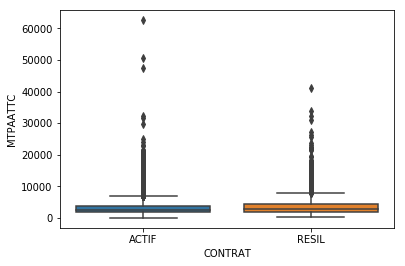

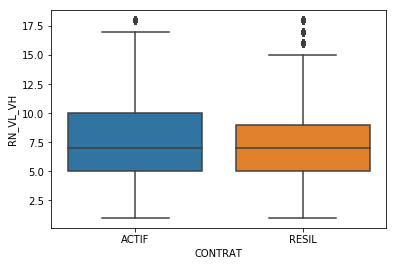

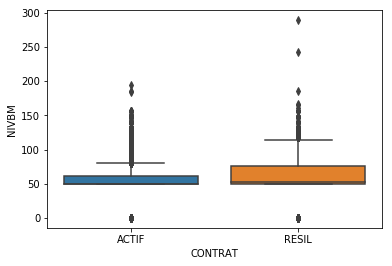

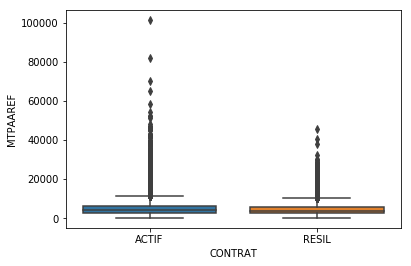

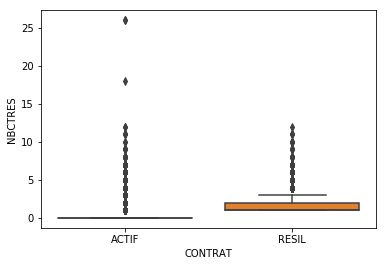

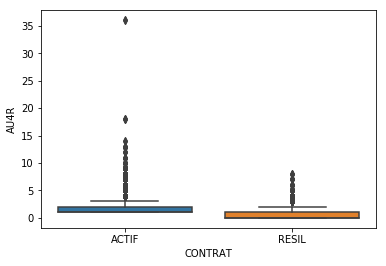

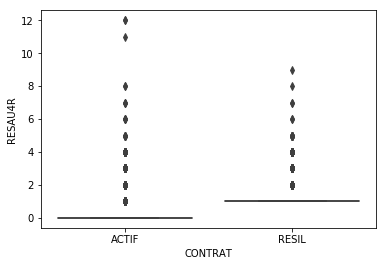

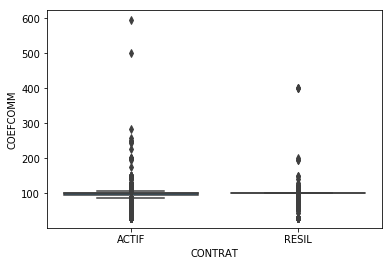

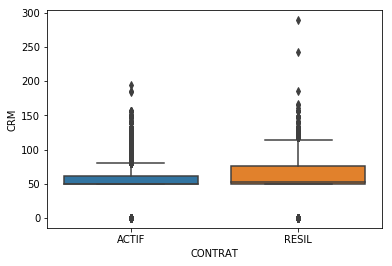

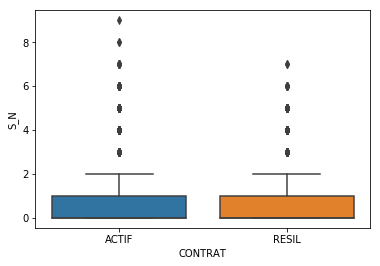

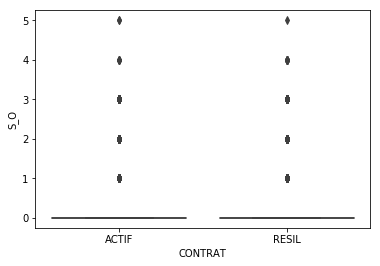

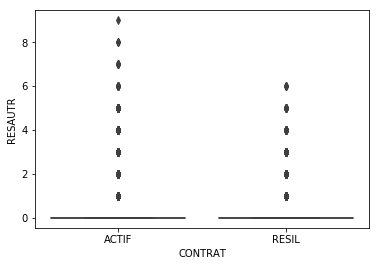

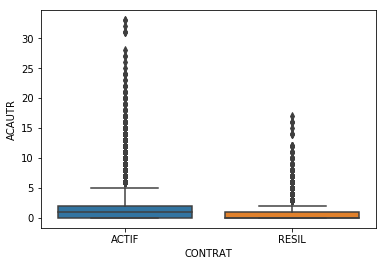

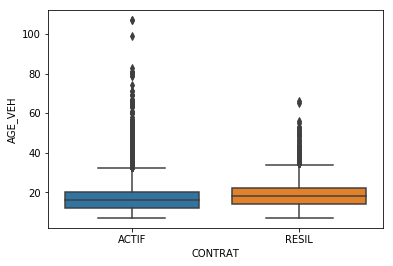

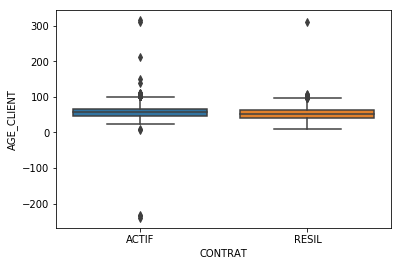

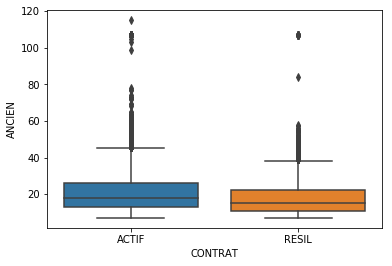

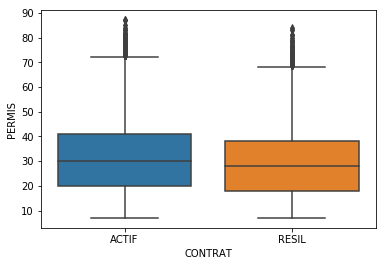

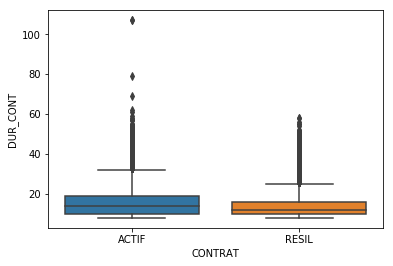

In [239]:
dat = list (num_df)[:-1]

import matplotlib.pyplot as plt 
plt.subplots()
for d in dat:
    plt.hold(True)
    sns.boxplot(x= "CONTRAT" , y= d, data=num_df)
    plt.show()


Variable AGE_CLIENT contient des valeurs aberrantes 

# Matrice de corrélation

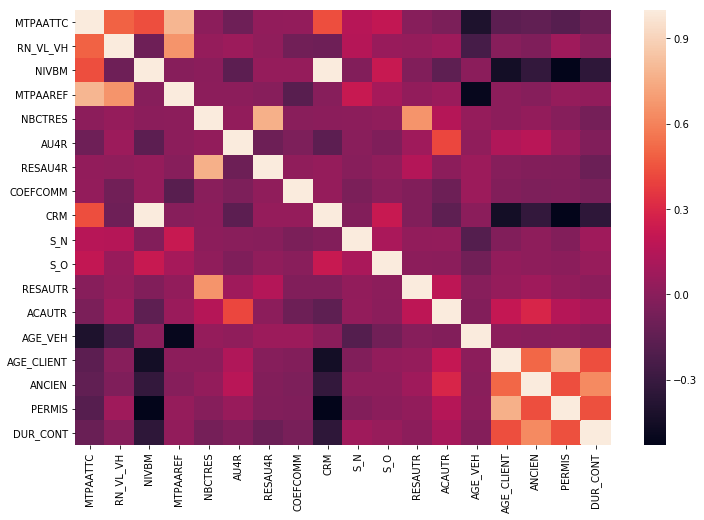

In [240]:
# Correlation between numeric variables
cols = list(pnd.DataFrame(df.select_dtypes(include=['float64', 'int64', 'int32']).copy()).columns.values)
numcols = [x for x in df.columns if x in cols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=df[numcols].corr())
plt.show()
plt.gcf().clear()

# Relation entre les variables numériques 

In [241]:
#sns.pairplot(num_df, hue = "CONTRAT", vars = list (num_df)[:-1]);

# Distribution des variables numériques 

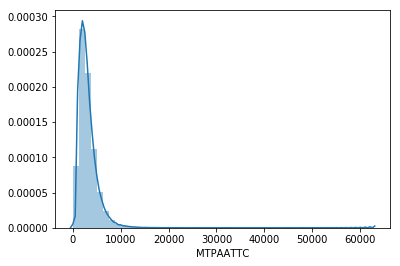

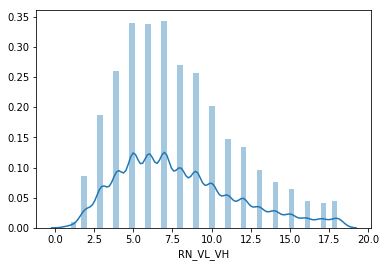

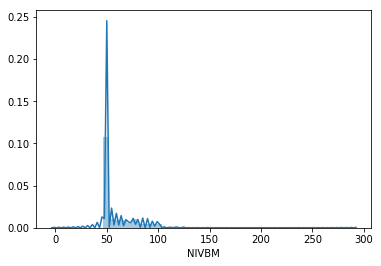

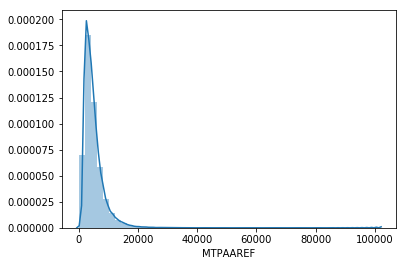

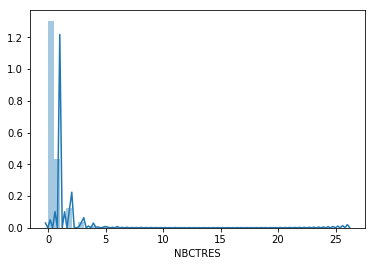

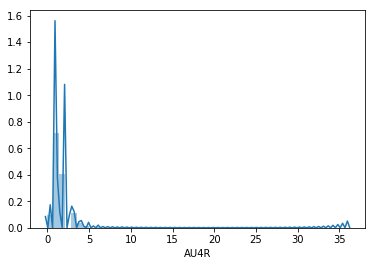

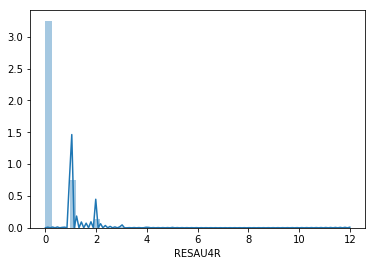

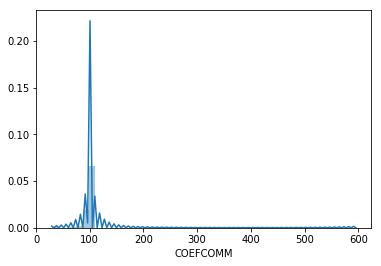

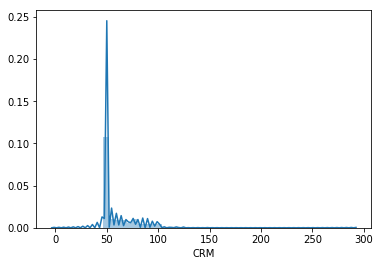

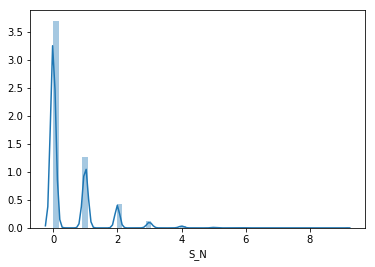

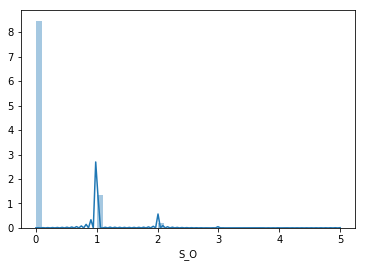

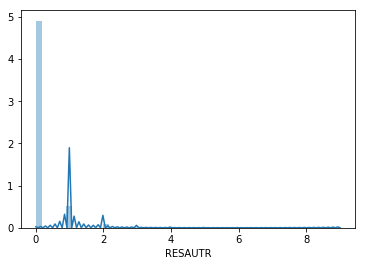

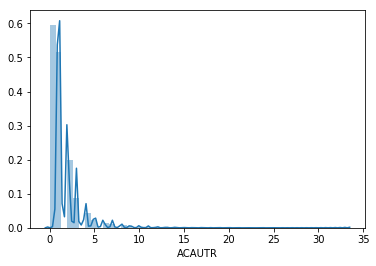

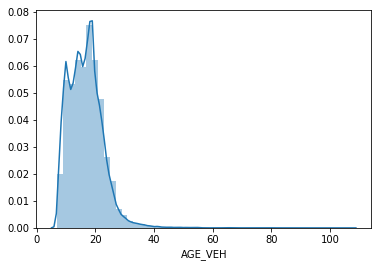

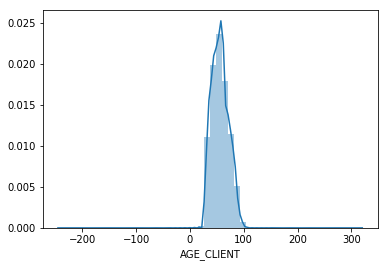

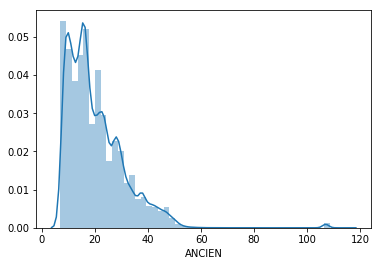

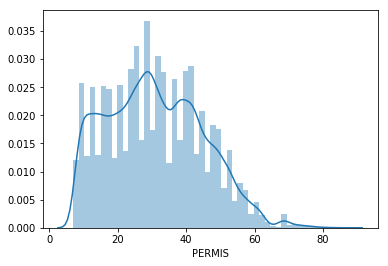

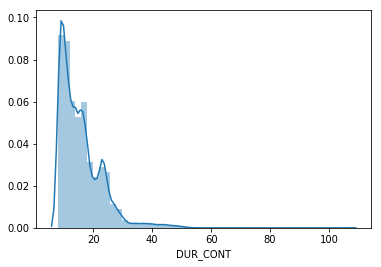

In [242]:
dat = list (num_df)[:-1]

import matplotlib.pyplot as plt 
plt.subplots()
for d in dat:
    plt.hold(True)
    sns.distplot(df[d])
    plt.show()


Les variables MTPAATTC et MTPAAREF ont des distributions similaires 

# Traitement des valeurs aberantes

In [244]:
num_df = pnd.DataFrame(df.select_dtypes(include=['float64', 'int64', 'int32']).copy())
nm_df = df.drop(["S_N", "S_O", "RESAUTR", "ACAUTR"], axis=1)

cols = list(nm_df.columns.values)

def outlier(col_name):
    q1 = float(nm_df[col_name].quantile(0.25))
    q3 = float(nm_df[col_name].quantile(0.75))
    iqr = float(q3-q1) #Interquartile range
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    nm_df[col_name][(nm_df[col_name] < fence_low)] = fence_low
    nm_df[col_name][(nm_df[col_name] > fence_high)] = fence_high
    return nm_df[col_name]

for c in cols:
    outlier(c)

# Discrétiser les variables quantitatives 

In [245]:
num_df = pnd.DataFrame(df.select_dtypes(include=['float64', 'int64', 'int32']).copy())
num_df.describe ()

,MTPAATTC,RN_VL_VH,NIVBM,MTPAAREF,NBCTRES,AU4R,RESAU4R,COEFCOMM,CRM,S_N,S_O,RESAUTR,ACAUTR,AGE_VEH,AGE_CLIENT,ANCIEN,PERMIS,DUR_CONT
count,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000,88933.000000
mean,3063.497971,7.866338,59.114502,4967.275316,0.471602,1.524361,0.266077,97.575759,59.114502,0.480969,0.175593,0.146447,1.248918,16.688316,56.011481,20.245196,30.999775,15.670482
std,1943.113329,3.717366,16.173898,3446.971986,0.867002,1.005732,0.563361,8.323628,16.173898,0.811018,0.440724,0.461180,1.832703,5.797750,15.606280,10.871104,13.884428,7.167042
min,0.000000,1.000000,0.000000,171.880000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-240.000000,7.000000,7.000000,8.000000
25%,1769.350000,5.000000,50.000000,2733.000000,0.000000,1.000000,0.000000,96.000000,50.000000,0.000000,0.000000,0.000000,0.000000,12.000000,44.000000,12.000000,20.000000,10.000000
50%,2637.000000,7.000000,50.000000,4118.000000,0.000000,1.000000,0.000000,100.000000,50.000000,0.000000,0.000000,0.000000,1.000000,16.000000,55.000000,17.000000,30.000000,14.000000
75%,3833.480000,10.000000,64.000000,6121.000000,1.000000,2.000000,0.000000,100.000000,64.000000,1.000000,0.000000,0.000000,2.000000,20.000000,66.000000,26.000000,41.000000,19.000000
max,62556.820000,18.000000,289.000000,101296.000000,26.000000,36.000000,12.000000,595.000000,289.000000,9.000000,5.000000,9.000000,33.000000,107.000000,315.000000,115.000000,87.000000,107.000000


In [246]:
# Variable AGE_VEH
print(pnd.qcut(df.AGE_VEH,3))
df["AGE_VEHQ"]=pnd.qcut(df.AGE_VEH,3,labels=["inf14ans","entre14_19ans","sup19ans"])
df["AGE_VEHQ"].describe ()


0         (14.0, 19.0]
1         (14.0, 19.0]
2        (19.0, 107.0]
3         (14.0, 19.0]
5         (14.0, 19.0]
6        (19.0, 107.0]
7        (19.0, 107.0]
8        (6.999, 14.0]
9        (19.0, 107.0]
10       (19.0, 107.0]
11       (19.0, 107.0]
12        (14.0, 19.0]
13        (14.0, 19.0]
14       (6.999, 14.0]
15        (14.0, 19.0]
16        (14.0, 19.0]
17       (19.0, 107.0]
18        (14.0, 19.0]
19       (6.999, 14.0]
20        (14.0, 19.0]
21        (14.0, 19.0]
22       (6.999, 14.0]
23        (14.0, 19.0]
24        (14.0, 19.0]
25       (19.0, 107.0]
26       (6.999, 14.0]
27        (14.0, 19.0]
28       (19.0, 107.0]
29       (6.999, 14.0]
30       (19.0, 107.0]
             ...      
90216    (19.0, 107.0]
90217    (19.0, 107.0]
90218     (14.0, 19.0]
90219    (19.0, 107.0]
90220     (14.0, 19.0]
90221    (6.999, 14.0]
90222    (19.0, 107.0]
90223    (6.999, 14.0]
90224    (6.999, 14.0]
90225     (14.0, 19.0]
90227    (19.0, 107.0]
90228    (19.0, 107.0]
90229    (6

count        88933
unique           3
top       inf14ans
freq         33886
Name: AGE_VEHQ, dtype: object

In [247]:
# Variable AGE_VEH
print(pnd.qcut(df.AGE_CLIENT,4))
df["AGE_CLIENTQ"]=pnd.qcut(df.AGE_CLIENT,4,labels=["inf44ans","entre45_55ans","entre55_66ans", "sup66ans"])
df["AGE_CLIENTQ"].describe ()



0        (-240.001, 44.0]
1        (-240.001, 44.0]
2           (66.0, 315.0]
3        (-240.001, 44.0]
5           (66.0, 315.0]
6           (66.0, 315.0]
7            (44.0, 55.0]
8           (66.0, 315.0]
9        (-240.001, 44.0]
10           (44.0, 55.0]
11           (55.0, 66.0]
12          (66.0, 315.0]
13           (44.0, 55.0]
14           (44.0, 55.0]
15           (44.0, 55.0]
16           (44.0, 55.0]
17          (66.0, 315.0]
18           (44.0, 55.0]
19           (44.0, 55.0]
20           (44.0, 55.0]
21          (66.0, 315.0]
22           (44.0, 55.0]
23          (66.0, 315.0]
24           (55.0, 66.0]
25           (55.0, 66.0]
26           (55.0, 66.0]
27       (-240.001, 44.0]
28           (55.0, 66.0]
29           (44.0, 55.0]
30       (-240.001, 44.0]
               ...       
90216    (-240.001, 44.0]
90217       (66.0, 315.0]
90218    (-240.001, 44.0]
90219       (66.0, 315.0]
90220        (44.0, 55.0]
90221    (-240.001, 44.0]
90222    (-240.001, 44.0]
90223       

count        88933
unique           4
top       inf44ans
freq         22986
Name: AGE_CLIENTQ, dtype: object

In [248]:
# Variable ANCIEN

print(pnd.qcut(df.ANCIEN,4))
df["ANCIENQ"]=pnd.qcut(df.AGE_CLIENT,4,labels=["inf12ans","entre12_17ans","entre17_26ans", "sup26ans"])
df["ANCIENQ"].describe ()

0        (6.999, 12.0]
1        (6.999, 12.0]
2         (17.0, 26.0]
3        (6.999, 12.0]
5        (26.0, 115.0]
6        (26.0, 115.0]
7         (17.0, 26.0]
8         (17.0, 26.0]
9         (17.0, 26.0]
10        (17.0, 26.0]
11       (26.0, 115.0]
12       (26.0, 115.0]
13        (17.0, 26.0]
14       (26.0, 115.0]
15        (17.0, 26.0]
16       (26.0, 115.0]
17        (17.0, 26.0]
18        (17.0, 26.0]
19        (17.0, 26.0]
20        (17.0, 26.0]
21       (26.0, 115.0]
22       (26.0, 115.0]
23        (17.0, 26.0]
24        (17.0, 26.0]
25        (17.0, 26.0]
26        (17.0, 26.0]
27        (17.0, 26.0]
28        (17.0, 26.0]
29        (12.0, 17.0]
30        (12.0, 17.0]
             ...      
90216     (12.0, 17.0]
90217    (6.999, 12.0]
90218    (6.999, 12.0]
90219    (26.0, 115.0]
90220    (6.999, 12.0]
90221    (26.0, 115.0]
90222    (6.999, 12.0]
90223    (6.999, 12.0]
90224    (6.999, 12.0]
90225    (6.999, 12.0]
90227    (6.999, 12.0]
90228    (6.999, 12.0]
90229    (2

count        88933
unique           4
top       inf12ans
freq         22986
Name: ANCIENQ, dtype: object

In [249]:
df = df.drop(["AGE_VEH", "AGE_CLIENT", "ANCIEN"], axis = 1)

In [250]:
df.shape

(88933, 27)

In [251]:
# Variable PERMIS

print(pnd.qcut(df.PERMIS,3))
df["PERMISQ"]=pnd.qcut(df.PERMIS,3,labels=["inf24ans","entre25_37ans","sup37ans"])
df["PERMISQ"].describe ()

0        (6.999, 24.0]
1        (6.999, 24.0]
2        (6.999, 24.0]
3        (6.999, 24.0]
5         (37.0, 87.0]
6         (37.0, 87.0]
7         (24.0, 37.0]
8         (37.0, 87.0]
9        (6.999, 24.0]
10        (24.0, 37.0]
11        (37.0, 87.0]
12        (37.0, 87.0]
13        (24.0, 37.0]
14        (24.0, 37.0]
15        (24.0, 37.0]
16        (24.0, 37.0]
17        (37.0, 87.0]
18        (24.0, 37.0]
19        (24.0, 37.0]
20        (24.0, 37.0]
21        (37.0, 87.0]
22        (24.0, 37.0]
23        (37.0, 87.0]
24        (37.0, 87.0]
25        (24.0, 37.0]
26        (37.0, 87.0]
27       (6.999, 24.0]
28        (37.0, 87.0]
29        (24.0, 37.0]
30       (6.999, 24.0]
             ...      
90216    (6.999, 24.0]
90217     (37.0, 87.0]
90218    (6.999, 24.0]
90219     (37.0, 87.0]
90220    (6.999, 24.0]
90221    (6.999, 24.0]
90222     (24.0, 37.0]
90223    (6.999, 24.0]
90224     (37.0, 87.0]
90225     (24.0, 37.0]
90227     (37.0, 87.0]
90228     (24.0, 37.0]
90229     (

count        88933
unique           3
top       inf24ans
freq         31032
Name: PERMISQ, dtype: object

In [252]:
# Variable DUR_CONT

print(pnd.qcut(df.DUR_CONT,3))
df["DUR_CONTQ"]=pnd.qcut(df.DUR_CONT,3,labels=["inf11ans","entre11_17ans","sup17ans"])
df["DUR_CONTQ"].describe ()

0        (7.999, 11.0]
1        (7.999, 11.0]
2        (7.999, 11.0]
3        (7.999, 11.0]
5        (17.0, 107.0]
6        (17.0, 107.0]
7        (17.0, 107.0]
8        (17.0, 107.0]
9        (17.0, 107.0]
10       (17.0, 107.0]
11       (17.0, 107.0]
12       (17.0, 107.0]
13       (17.0, 107.0]
14       (17.0, 107.0]
15       (17.0, 107.0]
16       (17.0, 107.0]
17       (17.0, 107.0]
18       (17.0, 107.0]
19       (17.0, 107.0]
20       (17.0, 107.0]
21       (17.0, 107.0]
22       (17.0, 107.0]
23       (17.0, 107.0]
24       (17.0, 107.0]
25       (17.0, 107.0]
26       (17.0, 107.0]
27       (17.0, 107.0]
28        (11.0, 17.0]
29        (11.0, 17.0]
30        (11.0, 17.0]
             ...      
90216    (7.999, 11.0]
90217    (7.999, 11.0]
90218    (7.999, 11.0]
90219    (7.999, 11.0]
90220    (7.999, 11.0]
90221    (7.999, 11.0]
90222    (7.999, 11.0]
90223    (7.999, 11.0]
90224    (7.999, 11.0]
90225    (7.999, 11.0]
90227    (7.999, 11.0]
90228    (7.999, 11.0]
90229    (1

count        88933
unique           3
top       inf11ans
freq         31836
Name: DUR_CONTQ, dtype: object

In [253]:
df = df.drop(["PERMIS", "DUR_CONT"], axis = 1)
df.shape

(88933, 27)

# Modelling

In [254]:
#df = save
#coder la variable cible
df["CONTRAT"] = np.where(df["CONTRAT"].str.contains("RESIL"), 1, 0)
#One hot encoded of categorial variables
Z = pnd.get_dummies(df)

In [255]:
#data repartition
#Z = Z.as_matrix()

y = Z['CONTRAT']
X = Z.drop('CONTRAT', axis=1)

#création des 
#import random
#random.seed(123)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62253, 102) (26680, 102) (62253,) (26680,)


In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve,auc
from sklearn import metrics


algos = [] # liste des algorithmes employés
dfr = pnd.DataFrame() # tableau des résultats

def run(algo):
    global algos, dfr
    
    start = timeit.default_timer() # start chrono
    
    model = algo.fit(X_train, y_train) # algorithme d'apprentissage automatique
    y_pred1 = model.predict(X_train) # prédictions sur le train set
    acc_train = metrics.accuracy_score(y_train, y_pred1)
    #print("Accuracy on train set: %f" % acc_train)
    
    # prédictions sur le test set
    y_pred = model.predict(X_test)
    #matrice de confusion
    cm = metrics.confusion_matrix(y_test, y_pred)
    #print(cm)
    #taux de succès
    acc_test = metrics.accuracy_score(y_test, y_pred)
    #print("Accuracy on test set:  %f" % acc_test)
    #sensibilité (ou rappel)
    sensib = metrics.recall_score(y_test, y_pred)
    #print(se)
    #écrire sa propre func. d'éval - ex. specificité

    #la rendre utilisable - transformation en objet scorer
    specificite = metrics.make_scorer(specificity, greater_is_better=True)
    specif = specificite(model, X_test, y_test)
    #print(sp)
    
    #AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    
    stop = timeit.default_timer() # stop chrono

    # agrégation des résultats
    algos.append(algo)
    dfr = dfr.append([[algo.__class__.__name__, stop-start, acc_train, acc_test, sensib, specif, auc]], ignore_index=True)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import roc_curve,auc
from sklearn import metrics

#algos = [] # liste des algorithmes employés
#dfr = pnd.DataFrame() # tableau des résultats


def specificity(y,y_hat):
    #matrice de confusion – un objet numpy.ndarray
    mc = metrics.confusion_matrix(y,y_hat)
    #’’negative’’ est sur l'indice 0 dans la matrice
    import numpy
    res = mc[0,0]/numpy.sum(mc[0,:])
    #retour
    return res
 

def run1(algo):
    global algos, dfr, prob, model
    
    start = timeit.default_timer() # start chrono
    
    modele = algo.fit(X_train, y_train) # algorithme d'apprentissage automatique
    model = modele
    y_pred1 = modele.predict(X_train) # prédictions sur le train set
    acc_train = metrics.accuracy_score(y_train, y_pred1)
    #print("Accuracy on train set: %f" % acc_train)
    
    ###################################################
    ###################################################
    
    # prédictions sur le test set
    y_pred = modele.predict(X_test)
    
    #matrice de confusion
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("La table de confusion :")
    print(cm)
    #taux de succès
    acc_test = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy on test set :")
    print(acc_test)
    #sensibilité (ou rappel)
    se = metrics.recall_score(y_test, y_pred)#, pos_label='positive')
    #print("Sensibilté:  %f" %se)
    #écrire sa propre func. d'éval - ex. specificité
    #la rendre utilisable - transformation en objet scorer
    specificite = metrics.make_scorer(specificity, greater_is_better=True)
    sp = specificite(modele, X_test, y_test)
    #print("Specificité:  %f" %sp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print("Area under the curve :")
    print(metrics.auc(fpr, tpr))
    
    
    
    #calcul des probas d'affectation sur ech. test
    probas = modele.predict_proba(X_test)
    prob = probas
    #score de 'presence'
    score = probas[:,1]
    #transf. en 0/1 de Y_test
    pos = pnd.get_dummies(y_test).as_matrix()
    #on ne récupère que la 2è colonne (indice 1)
    pos = pos[:,1]
    #nombre total de positif
    import numpy
    npos = numpy.sum(pos) 
    #index pour tri selon le score croissant
    index = numpy.argsort(score)
    #inverser pour score décroissant – on s’intéresse à forte proba. en priorité
    index = index[::-1]
    #tri des individus (des valeurs 0/1)
    sort_pos = pos[index]
    #somme cumulée
    cpos = numpy.cumsum(sort_pos)
    #rappel
    rappel = cpos/npos
    #nb. obs ech.test
    n = y_test.shape[0]
    #taille de cible – séquence de valeurs de 1 à 26680 avec un pas de 1
    taille = numpy.arange(start=1,stop = 26681,step=1)
    #passer en proportion
    taille = taille / n
    
    
    
    # The magic happens here
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    skplt.metrics.plot_cumulative_gain(y_test, probas)
    plt.show()
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    stop = timeit.default_timer() # stop chrono

In [258]:
# chargement des algorithmes scikit-learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

#l'entrainement des différents algorithmes
algo = LogisticRegression()
run(algo)

algo = LinearSVC()
run(algo)

algo = DecisionTreeClassifier()
run(algo)

algo = RandomForestClassifier()
run(algo)

algo = GradientBoostingClassifier()
run(algo)

algo = xgb.XGBClassifier()
run(algo)

algo = KNeighborsClassifier()
run(algo)

algo = MLPClassifier()
run(algo)

In [262]:
dfr.columns = ['algo', 'time', 'train accuracy', 'test accuracy', 'sensibilité', 'spécificité', 'AUC']
dfr = dfr.drop("AUC", axis = 1)
dfr.sort_values(by='test accuracy', ascending=False, inplace=True)
dfr

,algo,time,train accuracy,test accuracy,sensibilité,spécificité
5,XGBClassifier,35.643025,0.961094,0.961432,0.694783,0.994606
4,GradientBoostingClassifier,42.530979,0.961223,0.961357,0.699187,0.993973
3,RandomForestClassifier,2.352734,0.996803,0.959258,0.695799,0.992035
0,LogisticRegression,3.627187,0.956934,0.957759,0.747967,0.983859
2,DecisionTreeClassifier,1.397248,0.999984,0.948501,0.778794,0.969614
1,LinearSVC,47.707088,0.936099,0.936657,0.842818,0.948331
7,MLPClassifier,15.461541,0.922221,0.924025,0.393631,0.990012
6,KNeighborsClassifier,15.171021,0.891186,0.878823,0.036924,0.983564


La table de confusion :
[[23600   128]
 [  901  2051]]
Accuracy on test set :
0.961431784107946
Area under the curve :
0.8446943635822064


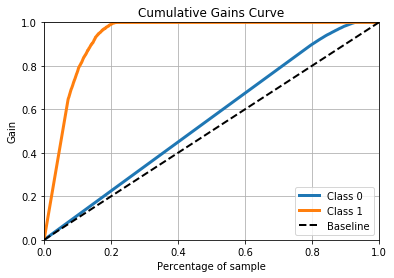

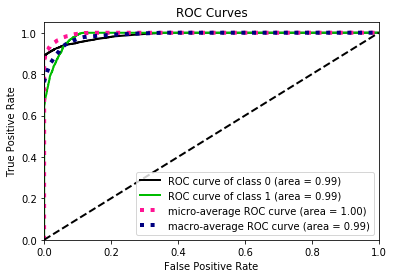

In [263]:
algo = xgb.XGBClassifier()
run1(algo)

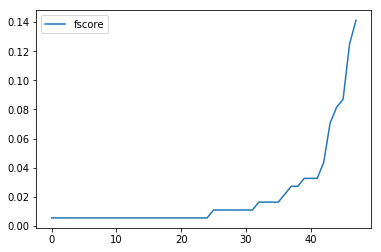

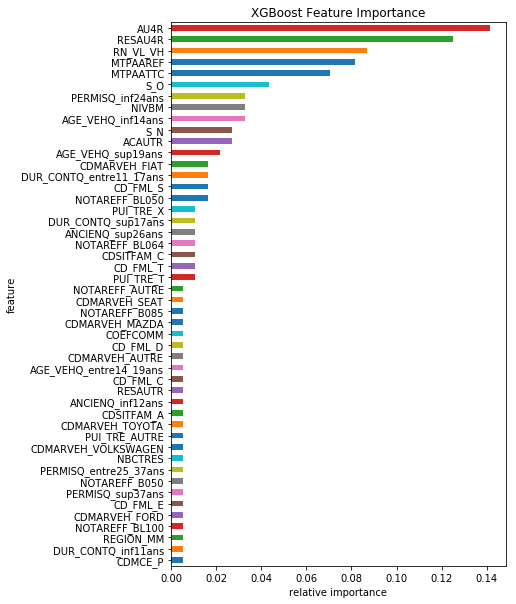

In [264]:
import pandas as pd
import xgboost as xgb
import operator
from matplotlib import pylab as plt

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
    
features = list(X_train.columns.values)

x_train = X_train

ceate_feature_map(features)

xgb_params = {"booster": "gbtree", "eta": 0.3, "max_depth": 6, "seed": 0, "silent": 0}
#num_rounds = 1000

dtrain = xgb.DMatrix(x_train, label=y_train)
#gbdt = xgb.train(xgb_params, dtrain, num_rounds)
gbdt = xgb.train(xgb_params, dtrain)

importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')